In [1]:
# 구글 드라이브 마운트하기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data_path = "./drive/MyDrive/titanic"

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd
import seaborn as sns

%matplotlib inline 
# 브라우저에서 바로 그림을 볼 수 있게 해 준다.

각 라이브러리 간단 설명!!
- numpy: 행렬, 다차원 배열 처리
- matplotlib, seaborn: 데이터 시각화
- torch: 머신러닝 구현. Logistic Regression을 구현하게 해 준다.
- pandas: 데이터 로딩, 조작

In [4]:
plt.rc('font', size=12)
plt.style.use('ggplot')

- 데이터 로드
- missing value 처리하기
- Exploratory Data Analysis
- Feature Engineering
- Logistic regression 모델링 & 학습

In [5]:
# 데이터 로드
df = pd.read_csv(f"{data_path}/train.csv")

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## missing value 처리하기

In [7]:
is_null = df.isnull() # 비어있는지 아닌지 확인시켜준다
is_null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
nul_cnts = is_null.sum(axis=0) # 세로축 합산

In [9]:
nul_cnts

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
len(df)

891

In [11]:
nul_cnts / len(df) # null값 비율

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [12]:
# Cabin 77.1% 의 missing value로 너무 많다! -> 탈락시키자
df.drop(columns=["Cabin"], inplace=True)
# inplace=True 데이터프레임 업뎃시킨다는 의미

In [13]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [14]:
df.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

=> key 값을 확인해 보니 "Cabin"이 제외된 것을 알 수 있다.

In [15]:
# Age, Embarked에 있는 missing data 채우기
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [16]:
df[df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


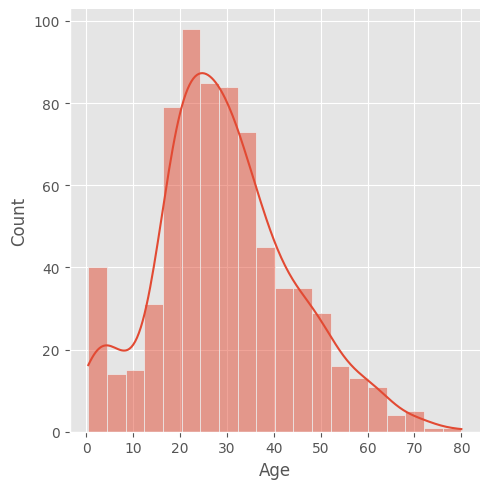

In [17]:
# Age 분포 확인해 보기
sns.displot(df['Age'], kde=True)

In [18]:
age = df['Age']

In [19]:
age_to_fill = df['Age'].median(skipna=True) # 중간값

In [20]:
age_to_fill

28.0

In [21]:
# Nan 값을 28로 채운다
df['Age'] = age.fillna(age_to_fill)

In [22]:
# Embarked
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


<Axes: xlabel='Embarked', ylabel='count'>

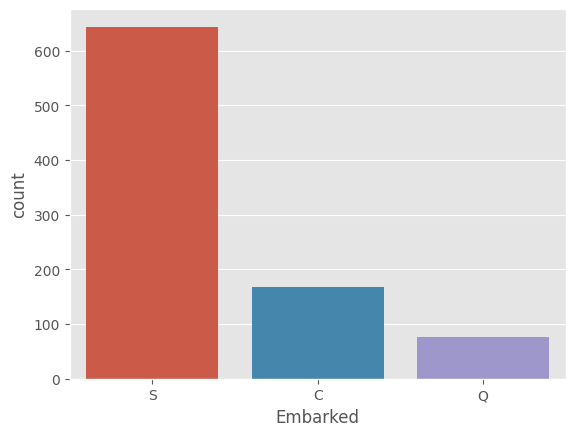

In [23]:
sns.countplot(x='Embarked', data=df)

위의 클래스 세 개, S, C, Q에서 가장 비중이 많은 S로 Nan값을 채운다.

In [24]:
df['Embarked'].value_counts().idxmax()

'S'

In [25]:
df['Embarked'].fillna(df['Embarked'].value_counts().idxmax(), inplace=True)

In [26]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [27]:
# missing value 채우는 함수 만들기
from copy import deepcopy

def preprocess(sample: pd.Series) :
  sample = deepcopy(sample)
  sample.drop('Cabin', inplace=True)
  sample['Age'] = 28 if pd.isna(sample['Age']) else sample['Age']
  sample['Embarked'] = 'S' if pd.isna(sample['Embarked']) else sample['Embarked']
  return sample


In [28]:
# 잘 적용되는지 확인해 보기
new_df = pd.read_csv(f"{data_path}/train.csv")

In [29]:
 # iloc: integer location 데이터 프레임의 행이나 칼럼의 순서를 나타내는 정수
new_df.iloc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [30]:
preprocess(new_df.iloc[0])

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Embarked                             S
Name: 0, dtype: object

In [31]:
new_df = new_df.apply(preprocess, axis=1)

In [32]:
# 이전에 직접 preprocessing 처리한 것과 함수로 처리한 것 비교
(df == new_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
886,True,True,True,True,True,True,True,True,True,True,True
887,True,True,True,True,True,True,True,True,True,True,True
888,True,True,True,True,True,True,True,True,True,True,True
889,True,True,True,True,True,True,True,True,True,True,True


In [33]:
(df == new_df).sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Embarked       891
dtype: int64

In [34]:
len(df)

891



## Exploratiry Data Analysis, EDA
: Visualization으로 feature engineering에 대해 insight 얻기



In [35]:
df.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [36]:
# 순서가 없는 카테고리
category_nominal_key_list = ['Sex', 'Embarked']

In [37]:
# 순서가 있는 카테고리
category_ordinal_key_list = ['Pclass']

In [38]:
numerical_discrete_key_list = ['Age', 'SibSp', 'Parch']

In [39]:
numerical_continuous_key_list = ['Fare']

## Category nominal feature
 

hue: 카테고리에 따라 색상 다르게 표시

In [40]:
def plot_categorical_df(df, name_list, hue='Survived'):
  for i, key in enumerate(name_list):
    plt.figure()
    sns.countplot(data=df, x=key, hue=hue)

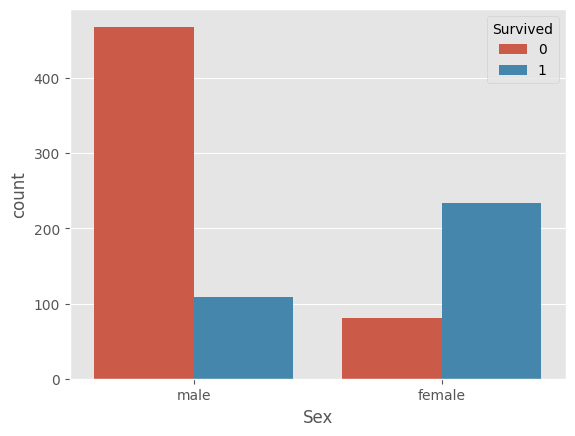

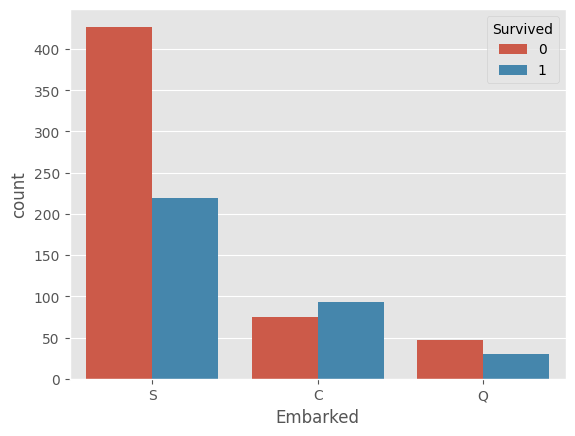

In [41]:
plot_categorical_df(df, category_nominal_key_list)

## Category ordinal

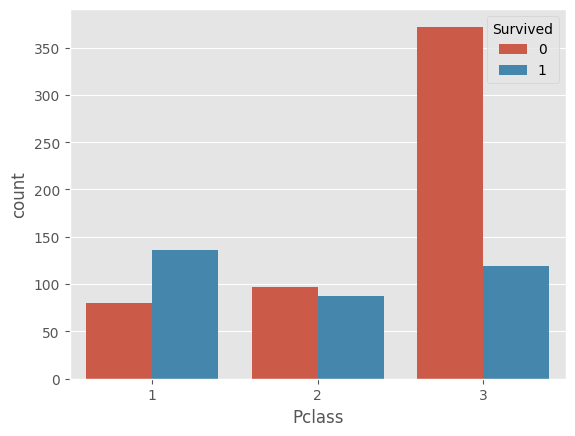

In [42]:
plot_categorical_df(df, category_ordinal_key_list)

## Numerical Discrete

In [43]:
numerical_discrete_key_list

['Age', 'SibSp', 'Parch']

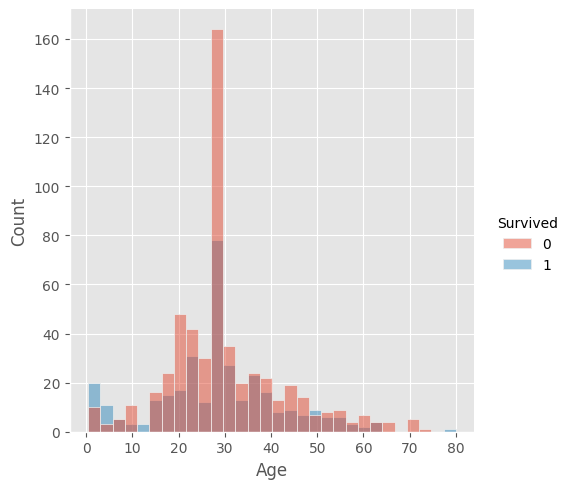

In [44]:
sns.displot(data=df, x='Age', hue='Survived')

In [45]:
def plot_numerical_df(df, name_list, kde=False):
  for name in name_list:
    plt.figure()
    sns.displot(data=df, x=name, kde=kde, hue='Survived')

<Figure size 640x480 with 0 Axes>

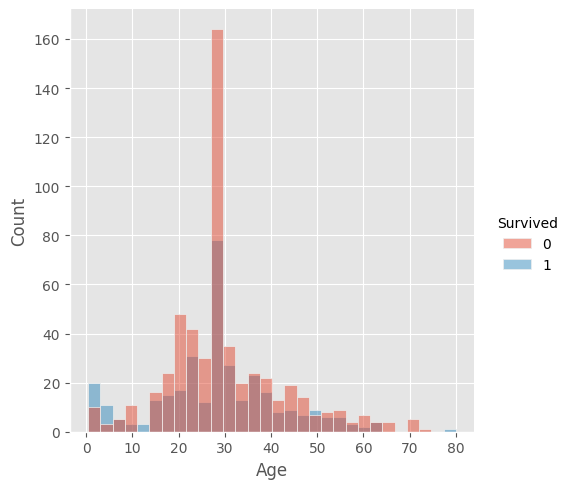

<Figure size 640x480 with 0 Axes>

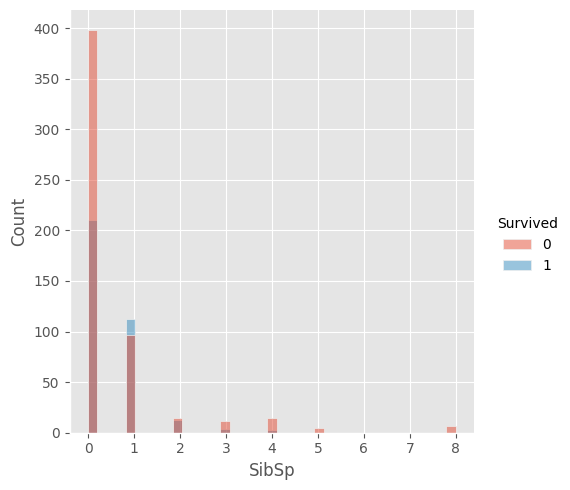

<Figure size 640x480 with 0 Axes>

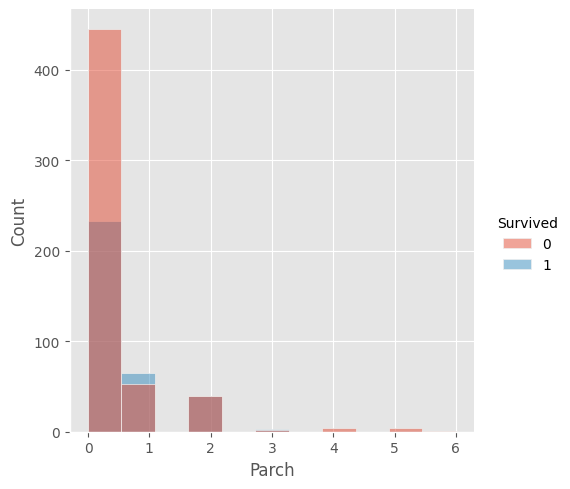

In [46]:
plot_numerical_df(df, numerical_discrete_key_list)

## Numerical Continuos

In [47]:
numerical_continuous_key_list

['Fare']

In [48]:
df[numerical_continuous_key_list].head()

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500


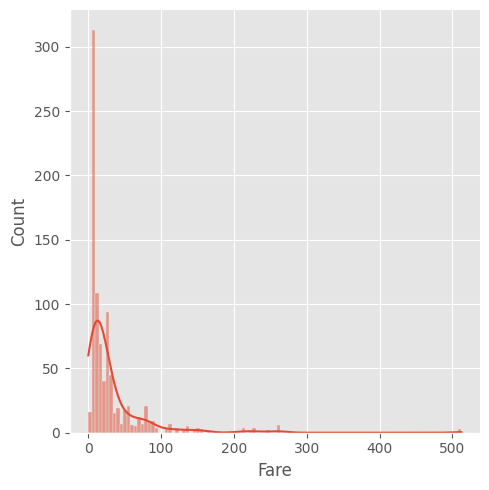

In [49]:
sns.displot(data=df, x='Fare', kde=True)

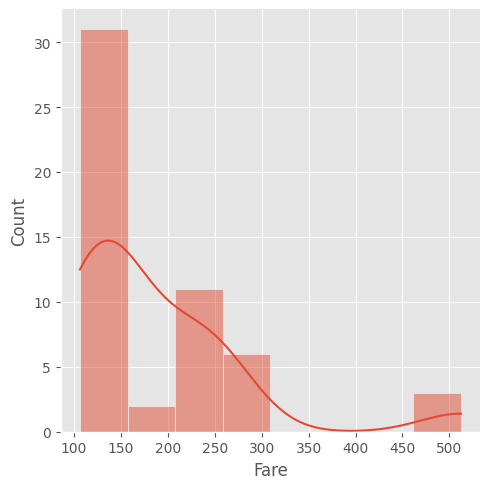

In [50]:
# 100-500달러에 산 사람들 확인하기
sns.displot(data=df[df['Fare'] > 100], x='Fare', kde=True)

## 기타 분석들

<Axes: xlabel='Pclass', ylabel='count'>

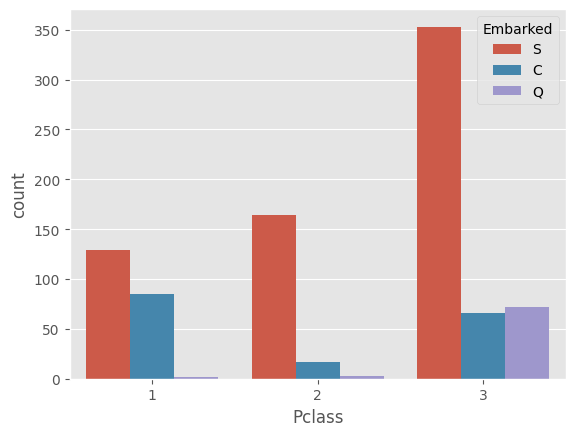

In [51]:
sns.countplot(data=df, x='Pclass', hue='Embarked')

<Axes: xlabel='Pclass', ylabel='count'>

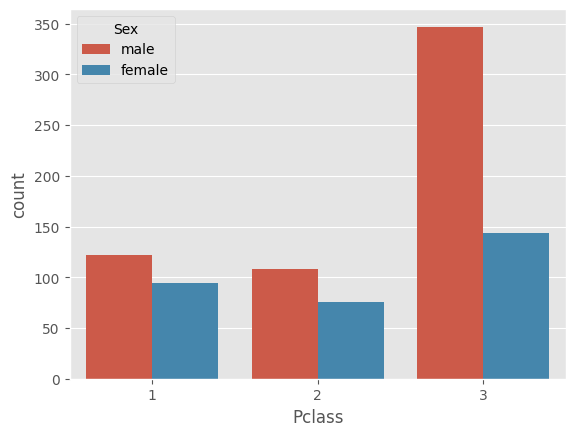

In [52]:
sns.countplot(data=df, x='Pclass', hue='Sex')

## Feature Engineering

In [53]:
# Sex ==> Binary로 바꿔주기
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [54]:
df[['Sex']].head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [55]:
# 딕셔너리
sex_to_id = {k: i for i, k in enumerate(df['Sex'].unique())}

In [56]:
sex_to_id

{'male': 0, 'female': 1}

In [57]:
df['Sex'].map(sex_to_id)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [58]:
# 피처 엔지니어링된 코드를 기록한다. ==> 함수 업데이트 why? 학습, 인퍼런스, 테스트에 사용해야 하므로
def to_feature(sample: pd.Series) :
  feature = {}

  # 외부에서 접근가능하도록
  # Sex
  global sex_to_id
  feature['Sex'] = sex_to_id[sample['Sex']]

  # Embarked
  # Pclass
  # Age
  # SibSp
  # Parch
  # Fare
    
  return pd.Series(feature)

In [59]:
# 첫번째 행
df.iloc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Embarked                             S
Name: 0, dtype: object

In [60]:
# 성별에 대해서만  feature를 만들었으므로 그에 대한 결과가 나타난다.
result = to_feature(df.iloc[0])

In [61]:
result

Sex    0
dtype: int64

In [62]:
# preprocessing 수행하기
feature_df = df.apply(to_feature, axis=1)

In [63]:
# 모든 레코드의 성별에 feature가 매겨진다
feature_df

,Sex
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,1
889,0


In [64]:
# Embarked ==> S, C, Q로 3개 이상의 카테고리 feature는 one-hot encoding으로!
id_to_embarked = list(df['Embarked'].unique())

In [65]:
id_to_embarked

['S', 'C', 'Q']

In [66]:
def to_onehot(sample, target, id_to_label):
    feature = {}
    for label in id_to_label:
        if label == sample[target]:
            feature[f'{target}__{label}'] = 1
        else:
            feature[f'{target}__{label}'] = 0
    return feature
  
# 함수 업데이트
def to_feature(sample: pd.Series):
    feature = {}
       
    # Sex
    global sex_to_id
    feature['Sex'] = sex_to_id[sample['Sex']]
    
    # Embarked
    global id_to_embarked
    feature.update(to_onehot(sample, 'Embarked', id_to_embarked))
    
    # Pclass
    # Age
    # SibSp
    # Parch
    # Fare
    
    return pd.Series(feature)

In [67]:
df.apply(to_feature, axis=1).head(5)

,Sex,Embarked__S,Embarked__C,Embarked__Q
0,0,1,0,0
1,1,0,1,0
2,1,1,0,0
3,1,1,0,0
4,0,1,0,0


In [68]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [69]:
# 참고!! pandas에는 동일한 역할을 해주는 함수가 있다.
pd.get_dummies(df, columns=["Embarked"]).head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1


In [70]:
# Pclass ==> ordinal이므로 그대로 뽑는다

def to_onehot(sample, target, id_to_label):
    feature = {}
    for label in id_to_label:
        if label == sample[target]:
            feature[f'{target}__{label}'] = 1
        else:
            feature[f'{target}__{label}'] = 0
    return feature

# 이 함수를 업데이트
def to_feature(sample: pd.Series):
    feature = {}
       
    # Sex
    global sex_to_id
    feature['Sex'] = sex_to_id[sample['Sex']]
    
    # Embarked
    global id_to_embarked
    feature.update(to_onehot(sample, 'Embarked', id_to_embarked))
    
    # Pclass
    feature['Pclass'] = sample['Pclass']
    # Age
    # SibSp
    # Parch
    # Fare
    
    return pd.Series(feature)

In [71]:
df.apply(to_feature, axis=1).head(5)

,Sex,Embarked__S,Embarked__C,Embarked__Q,Pclass
0,0,1,0,0,3
1,1,0,1,0,1
2,1,1,0,0,3
3,1,1,0,0,1
4,0,1,0,0,3


In [72]:
# Age ==> 나이는 discrete numerical feature로 볼 수도 있고, ordinal categorical feature로 볼 수도 있다.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Figure size 640x480 with 0 Axes>

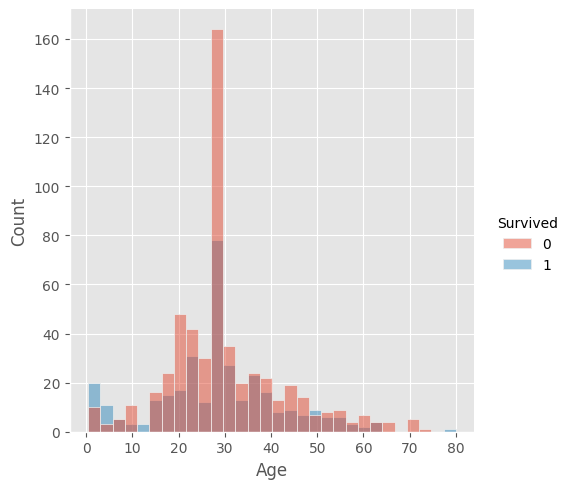

In [73]:
plot_numerical_df(df, ['Age'])

In [74]:
df['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [75]:
# 5살 단위로 bucketing하기

def to_onehot(sample, target, id_to_label):
    feature = {}
    for label in id_to_label:
        if label == sample[target]:
            feature[f'{target}__{label}'] = 1
        else:
            feature[f'{target}__{label}'] = 0
    return feature


# 이 함수를 업데이트
def to_feature(sample: pd.Series):
    feature = {}
       
    # Sex
    global sex_to_id
    feature['Sex'] = sex_to_id[sample['Sex']]
    
    # Embarked
    global id_to_embarked
    feature.update(to_onehot(sample, 'Embarked', id_to_embarked))
    
    # Pclass
    feature['Pclass'] = sample['Pclass']
    
    # Age
    # bucketing
    feature['Age'] = sample['Age'] // 5
    
    # SibSp
    # Parch
    # Fare
    
    return pd.Series(feature)

In [76]:
df.apply(to_feature, axis=1).head(5)

,Sex,Embarked__S,Embarked__C,Embarked__Q,Pclass,Age
0,0.0,1.0,0.0,0.0,3.0,4.0
1,1.0,0.0,1.0,0.0,1.0,7.0
2,1.0,1.0,0.0,0.0,3.0,5.0
3,1.0,1.0,0.0,0.0,1.0,7.0
4,0.0,1.0,0.0,0.0,3.0,7.0


In [77]:
# Sibsp(Sibling & spous), Parch, Fare
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Figure size 640x480 with 0 Axes>

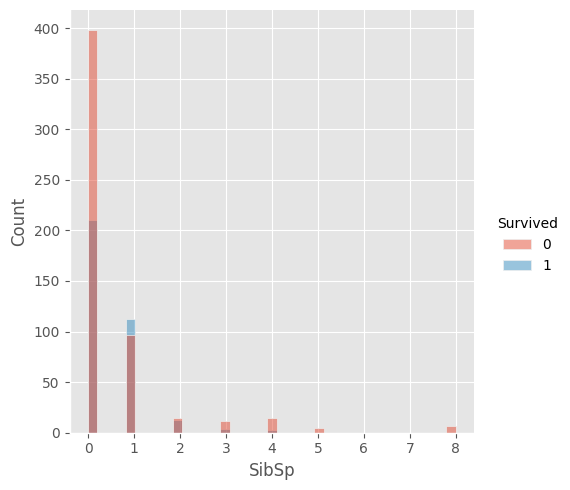

<Figure size 640x480 with 0 Axes>

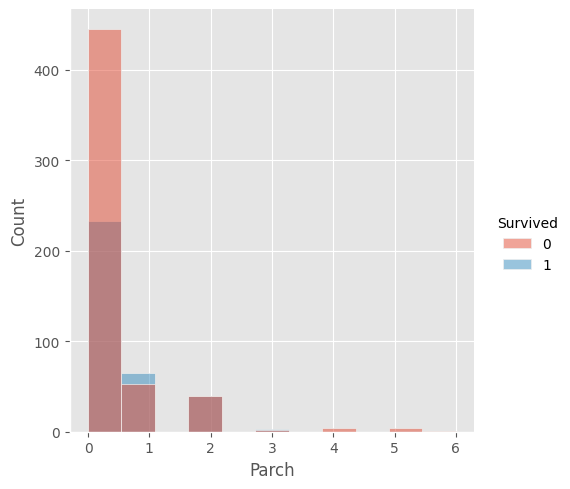

<Figure size 640x480 with 0 Axes>

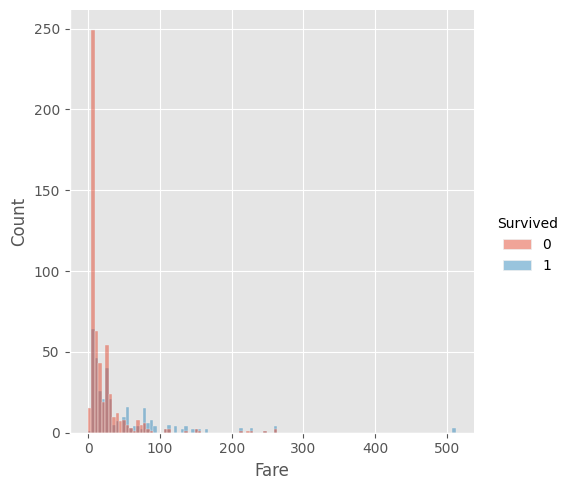

In [78]:
plot_numerical_df(df, ['SibSp', 'Parch', 'Fare'])

In [79]:
# ==> 위의 세 개는 그대로 쓰기

def to_onehot(sample, target, id_to_label):
    feature = {}
    for label in id_to_label:
        if label == sample[target]:
            feature[f'{target}__{label}'] = 1
        else:
            feature[f'{target}__{label}'] = 0
    return feature


# 이 함수를 업데이트
def to_feature(sample: pd.Series):
    feature = {}
       
    # Sex
    global sex_to_id
    feature['Sex'] = sex_to_id[sample['Sex']]
    
    # Embarked
    global id_to_embarked
    feature.update(to_onehot(sample, 'Embarked', id_to_embarked))
    
    # Pclass
    feature['Pclass'] = sample['Pclass']
    
    # Age
    # bucketing
    feature['Age'] = sample['Age'] // 5
    
    # SibSp
    feature['SibSp'] = sample['SibSp']
    # Parch
    feature['Parch'] = sample['Parch']
    # Fare
    feature['Fare'] = sample['Fare']
    
    return pd.Series(feature)

In [80]:
df.apply(to_feature, axis=1).head(10)

,Sex,Embarked__S,Embarked__C,Embarked__Q,Pclass,Age,SibSp,Parch,Fare
0,0.0,1.0,0.0,0.0,3.0,4.0,1.0,0.0,7.2500
1,1.0,0.0,1.0,0.0,1.0,7.0,1.0,0.0,71.2833
2,1.0,1.0,0.0,0.0,3.0,5.0,0.0,0.0,7.9250
3,1.0,1.0,0.0,0.0,1.0,7.0,1.0,0.0,53.1000
4,0.0,1.0,0.0,0.0,3.0,7.0,0.0,0.0,8.0500
5,0.0,0.0,0.0,1.0,3.0,5.0,0.0,0.0,8.4583
6,0.0,1.0,0.0,0.0,1.0,10.0,0.0,0.0,51.8625
7,0.0,1.0,0.0,0.0,3.0,0.0,3.0,1.0,21.0750
8,1.0,1.0,0.0,0.0,3.0,5.0,0.0,2.0,11.1333
9,1.0,0.0,1.0,0.0,2.0,2.0,1.0,0.0,30.0708


## Normalization

In [81]:
# Min Max Normalization: 0~1 사이의 값으로 바꾸기 Age, SibSp, Parch, Fare
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [82]:
age_min, age_max = 0, df['Age'].max() // 5

In [84]:
sibsp_min, sibsp_max = df['SibSp'].min(), df['SibSp'].max()

In [85]:
parch_min, parch_max = df['Parch'].min(), df['Parch'].max()

In [86]:
fare_min, fare_max = df['Fare'].min(), df['Fare'].max()

In [87]:
pclass_min, pclass_max = df['Pclass'].min(), df['Pclass'].max()

In [88]:
def to_onehot(sample, target, id_to_label):
    feature = {}
    for label in id_to_label:
        if label == sample[target]:
            feature[f'{target}__{label}'] = 1
        else:
            feature[f'{target}__{label}'] = 0
    return feature

def normalize(val, min_val, max_val):
    return (val - min_val)/(max_val-min_val)

# 이 함수를 업데이트
def to_feature(sample: pd.Series):
    feature = {}
       
    # Sex
    global sex_to_id
    feature['Sex'] = sex_to_id[sample['Sex']]
    
    # Embarked
    global id_to_embarked
    feature.update(to_onehot(sample, 'Embarked', id_to_embarked))
    
    # Pclass
    global pclass_min, pclass_max
    feature['Pclass'] = normalize(sample['Pclass'], pclass_min, pclass_max)
    
    # Age
    # bucketing
    global age_min, age_max
    feature['Age'] = normalize(sample['Age'] // 5, age_min, age_max)
    
    # SibSp
    global sibsp_min, sibsp_max
    feature['SibSp'] = normalize(sample['SibSp'], sibsp_min, sibsp_max)
    # Parch
    global parch_min, parch_max
    feature['Parch'] = normalize(sample['Parch'], parch_min, parch_max)
    # Fare
    global fare_min, fare_max
    feature['Fare'] = normalize(sample['Fare'], fare_min, fare_max)
    
    if 'Survived' in sample:
        feature['Survived'] = sample['Survived']
    
    return pd.Series(feature)

## preprocess와 to_feature 연결하기

In [90]:
df = pd.read_csv(f"{data_path}/train.csv")

In [91]:
df = df.apply(lambda sample: to_feature(preprocess(sample)), axis=1)

In [93]:
# preprocess와 to feature 반영된 새로운 df 불러오기
df.head()

,Sex,Embarked__S,Embarked__C,Embarked__Q,Pclass,Age,SibSp,Parch,Fare,Survived
0,0.0,1.0,0.0,0.0,1.0,0.2500,0.125,0.0,0.014151,0.0
1,1.0,0.0,1.0,0.0,0.0,0.4375,0.125,0.0,0.139136,1.0
2,1.0,1.0,0.0,0.0,1.0,0.3125,0.000,0.0,0.015469,1.0
3,1.0,1.0,0.0,0.0,0.0,0.4375,0.125,0.0,0.103644,1.0
4,0.0,1.0,0.0,0.0,1.0,0.4375,0.000,0.0,0.015713,0.0


In [94]:
# x와 y 나누기

# 셔플
df = df.sample(frac=1.) 

# Survived만 빼기
feature_keys = set(df.keys()).difference(set(['Survived']))
y_all, x_all = df['Survived'].to_numpy(), df[feature_keys].to_numpy()

<ipython-input-94-34cbdf878bb5>:8: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  y_all, x_all = df['Survived'].to_numpy(), df[feature_keys].to_numpy()


In [95]:
feature_keys

{'Age',
 'Embarked__C',
 'Embarked__Q',
 'Embarked__S',
 'Fare',
 'Parch',
 'Pclass',
 'Sex',
 'SibSp'}

In [96]:
# train, test 나누기
# train: 0.8
# test: 0.2
n_train = int(len(y_all) * 0.8)

y_train = y_all[:n_train]
x_train = x_all[:n_train]

y_test = y_all[n_train:]
x_test = x_all[n_train:]

In [97]:
y_train[:5]

array([0., 1., 0., 1., 1.])

In [99]:
# feature 리스트
x_train[:5]

array([[0.        , 1.        , 0.        , 0.        , 0.625     ,
        0.        , 0.        , 0.01512699, 1.        ],
       [1.        , 1.        , 0.        , 0.        , 0.25      ,
        0.        , 0.        , 0.01415106, 1.        ],
       [0.        , 1.        , 0.        , 0.        , 0.4375    ,
        0.        , 0.        , 0.02049464, 0.5       ],
       [1.        , 1.        , 0.25      , 0.        , 0.625     ,
        0.        , 0.        , 0.10048071, 0.        ],
       [1.        , 1.        , 0.125     , 0.        , 0.125     ,
        0.33333333, 0.        , 0.2342244 , 0.        ]])

## Logistic regression 모델링 & 학습

In [100]:
import torch
import torch.nn as nn
from torch.optim import SGD

In [102]:
## nn.Module 상속
class LogisticRegression(nn.Module):
    
    def __init__(self, n_feature=9):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(n_feature))  # 9개의 파라미터를 만들게되는 것
        self.bias = nn.Parameter(torch.randn(1))
        
    def forward(self, x): # x: n_samples x n_feature
        logit = torch.sum(x * self.weight + self.bias, dim=1)
        
        return torch.sigmoid(logit)

# rand: random normal

In [103]:
model = LogisticRegression(n_feature=9)

In [104]:
# data tensor화 하기
x_train_ts = torch.tensor(x_train)
y_train_ts = torch.tensor(y_train)

In [105]:
x_train_ts[:5]

tensor([[0.0000, 1.0000, 0.0000, 0.0000, 0.6250, 0.0000, 0.0000, 0.0151, 1.0000],
        [1.0000, 1.0000, 0.0000, 0.0000, 0.2500, 0.0000, 0.0000, 0.0142, 1.0000],
        [0.0000, 1.0000, 0.0000, 0.0000, 0.4375, 0.0000, 0.0000, 0.0205, 0.5000],
        [1.0000, 1.0000, 0.2500, 0.0000, 0.6250, 0.0000, 0.0000, 0.1005, 0.0000],
        [1.0000, 1.0000, 0.1250, 0.0000, 0.1250, 0.3333, 0.0000, 0.2342, 0.0000]],
       dtype=torch.float64)

In [106]:
y = model(x_train_ts)

## Cost 함수

In [107]:
def cost_f(y_gold, y_pred):
    losses = -y_gold*torch.log(y_pred) -(1.-y_gold)*torch.log((1.-y_pred))
    return torch.mean(losses)

In [108]:
optimizer = SGD(model.parameters(), lr=0.1)

In [109]:
weight_history = []
bias_history = []

In [110]:
for step in range(1000):
    optimizer.zero_grad()
    y_pred = model(x_train_ts)
    cost = cost_f(y_train_ts, y_pred) 
    
    if step % 100 == 0:
        n_diff = sum((y_pred > 0.5) == (y_train_ts > 0.5))
        total = len(y_train_ts)
        print(f"cost: {cost.item():0.4f}, acc: {n_diff/total:0.4f}")

    weight_history.append(model.weight.tolist())
    bias_history.append(model.bias.item())
    
    cost.backward()
    optimizer.step()

cost: 2.2324, acc: 0.3764
cost: 0.4983, acc: 0.8076
cost: 0.4684, acc: 0.8188
cost: 0.4558, acc: 0.8188
cost: 0.4497, acc: 0.8160
cost: 0.4464, acc: 0.8118
cost: 0.4445, acc: 0.8090
cost: 0.4433, acc: 0.8076
cost: 0.4425, acc: 0.8062
cost: 0.4419, acc: 0.8034


## Evaluation

In [117]:
# Test dataset tensor화 하기
x_test_ts = torch.tensor(x_test)
y_test_ts = torch.tensor(y_test)

In [118]:
y_pred = model(x_test_ts)

In [119]:
total = len(y_test_ts)
n_diff = sum((y_pred > 0.5) == (y_test_ts > 0.5))

In [120]:
test_acc = n_diff/total
print(f"test accuracy: {test_acc.item()}")

test accuracy: 0.7597765326499939


## 파라미터 업데이트 모양
가로: step, 세로: 파라미터

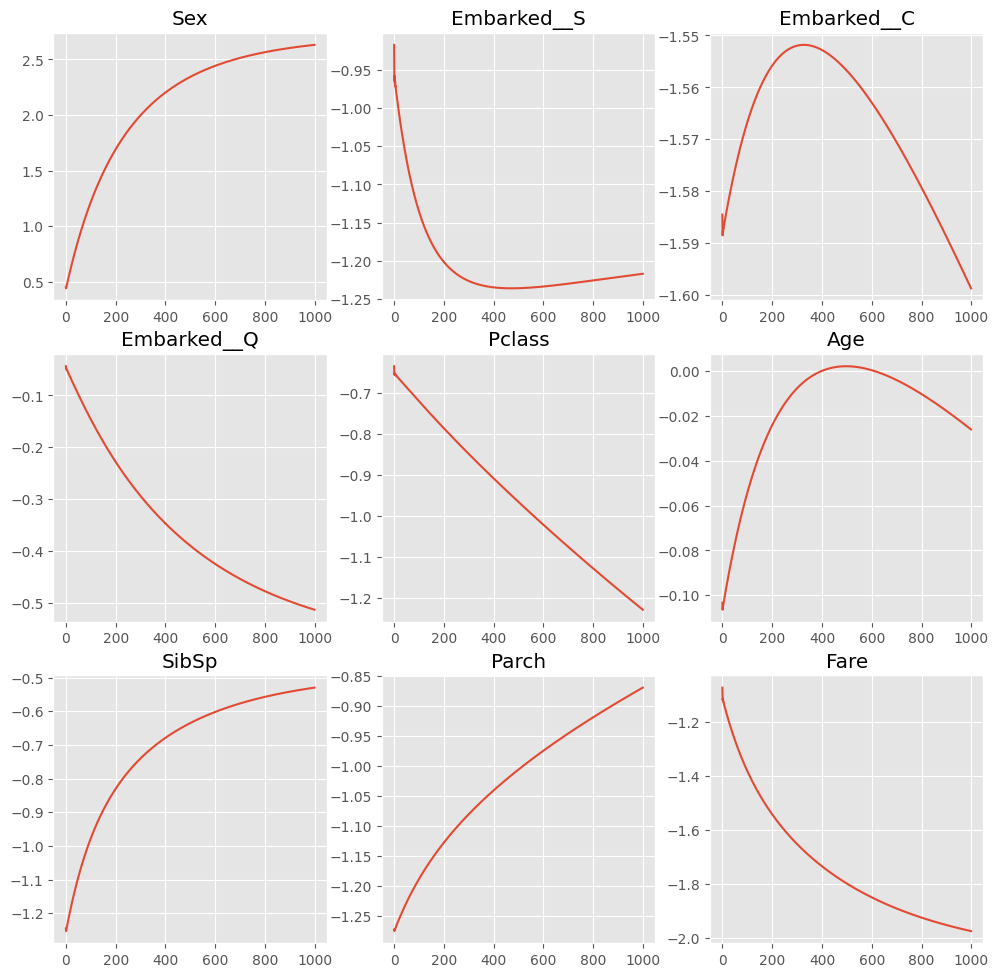

In [122]:
headers = ['Sex',
           'Embarked__S',
           'Embarked__C',
           'Embarked__Q',
           'Pclass',
           'Age',
           'SibSp',
           'Parch',
           'Fare'] 

weight_history = np.array(weight_history)

plt.figure(figsize=(12,16))
for i, header in enumerate(headers):
    plt.subplot(4,3,i+1)
    plt.title(header)
    plt.plot(range(len(weight_history)), weight_history[:, i])

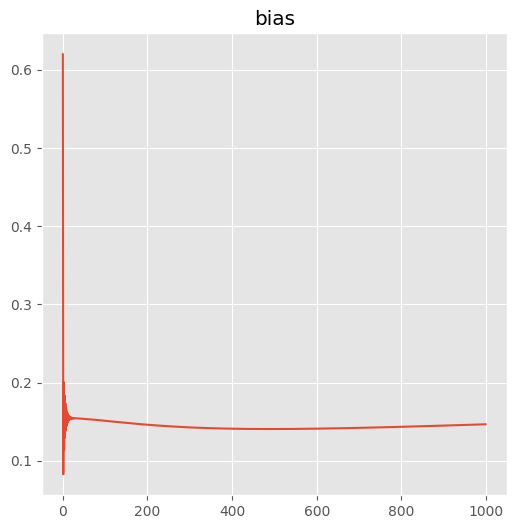

In [123]:
plt.figure(figsize=(6,6))
plt.title('bias')
plt.plot(range(len(bias_history)), bias_history)